In [9]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sts
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Image greyscaling should be between 0 and 1 not 0 and 255
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# Define the model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [11]:
# Train the model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 30s 71ms/step - loss: 0.3730 - accuracy: 0.8846 - val_loss: 0.0816 - val_accuracy: 0.9785
Epoch 2/15
422/422 [==============================] - 29s 70ms/step - loss: 0.1138 - accuracy: 0.9645 - val_loss: 0.0549 - val_accuracy: 0.9848
Epoch 3/15
422/422 [==============================] - 29s 70ms/step - loss: 0.0841 - accuracy: 0.9744 - val_loss: 0.0514 - val_accuracy: 0.9872
Epoch 4/15
422/422 [==============================] - 29s 68ms/step - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0471 - val_accuracy: 0.9882
Epoch 5/15
422/422 [==============================] - 30s 70ms/step - loss: 0.0619 - accuracy: 0.9813 - val_loss: 0.0398 - val_accuracy: 0.9900
Epoch 6/15
422/422 [==============================] - 29s 68ms/step - loss: 0.0568 - accuracy: 0.9827 - val_loss: 0.0390 - val_accuracy: 0.9882
Epoch 7/15
422/422 [==============================] - 29s 68ms/step - loss: 0.0509 - accuracy: 0.9842 - val_loss: 0.0359 - val_accuracy:

In [12]:
# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02503575012087822
Test accuracy: 0.9912999868392944


In [15]:
!pip install shap
import shap

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
shap_values = e.shap_values(x_test[1:5])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 33.2 MB/s eta 0:00:00


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


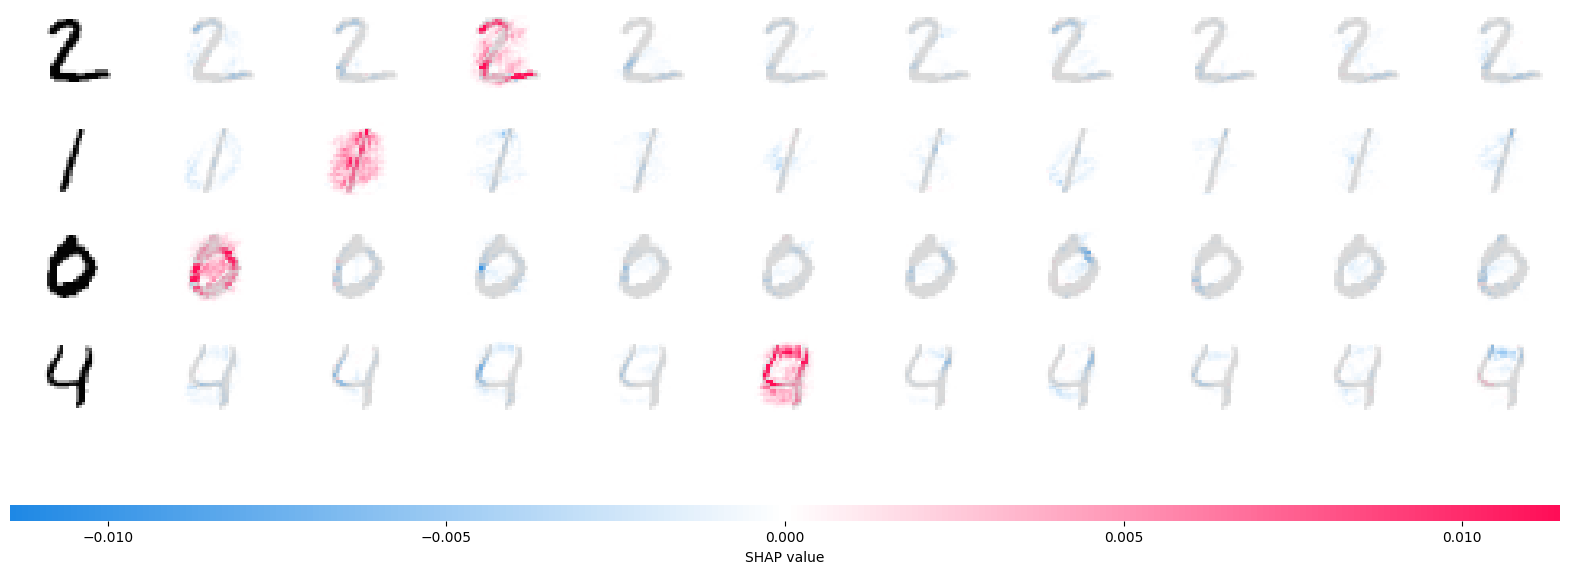

In [16]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])